# 使用Selenium抓取TripAdvisor用户评论



tripadvisor中文网站叫做猫途鹰 [www.tripadvisor.cn/](https://www.tripadvisor.cn/) 。
- 对于酒店和景点的用户评论。
- 但是默认只显示中文评论！
- 需要点击所有评论才能显示其它语言的用户评论。
    

In [84]:
url = 'https://www.tripadvisor.cn/Hotel_Review-g294213-d1459920-Reviews-Somerset_Jiefangbei_Chongqing-Chongqing.html#REVIEWS'
print(url)

https://www.tripadvisor.cn/Hotel_Review-g294213-d1459920-Reviews-Somerset_Jiefangbei_Chongqing-Chongqing.html#REVIEWS


- inspect
- copy
- copy selector

#component_10 > div > div:nth-child(3) > div.location-review-filters-hr-ReviewFilters__filters_wrap--3zsVa > div.ui_columns > div.ui_column.is-3-tablet.is-shown-at-tablet > ul > li:nth-child(1) > label

#component_10 > div > div:nth-child(3) > div.location-review-filters-hr-ReviewFilters__filters_wrap--3zsVa > div.ui_columns > div.ui_column.is-3-tablet.is-shown-at-tablet > ul > li:nth-child(1) > label



In [63]:
!python3 -m pip install pyppeteer

Processing /Users/datalab/Library/Caches/pip/wheels/34/e0/5d/070e22eceecf7ecd5fa4b86bbc18c1c7d0b90e02e9b57f35eb/pyppeteer-0.0.25-cp37-none-any.whl
  Using cached pyee-7.0.1-py2.py3-none-any.whl (12 kB)
  Using cached appdirs-1.4.3-py2.py3-none-any.whl (12 kB)
  Using cached websockets-8.1-cp37-cp37m-macosx_10_6_intel.whl (66 kB)


In [64]:
import asyncio
from pyppeteer import launch

In [85]:
from selenium import webdriver
import time

browser = webdriver.Chrome()

url = 'https://www.tripadvisor.cn/Hotel_Review-g294213-d1459920-Reviews-Somerset_Jiefangbei_Chongqing-Chongqing.html#REVIEWS'

browser.get(url) 
source1 = browser.page_source

loc = '#component_10 > div > div:nth-child(3) > div.location-review-filters-hr-ReviewFilters__filters_wrap--3zsVa > div.ui_columns > div.ui_column.is-3-tablet.is-shown-at-tablet > ul > li:nth-child(1) > label > span.location-review-review-list-parts-LanguageFilter__no_wrap--2Dckv'

browser.find_element_by_css_selector(loc).click()
time.sleep(2)
source2 = browser.page_source
browser.close()


In [86]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(source1, 'html.parser')
comments = soup.find_all('div', {'class':'hotels-community-tab-common-Card__card--ihfZB hotels-community-tab-common-Card__section--4r93H'})

comments[0].find('a', {'class', 'ui_header_link social-member-event-MemberEventOnObjectBlock__member--35-jC'}).text

'仔鴨'

In [87]:
soup = BeautifulSoup(source2, 'html.parser')
comments = soup.find_all('div', {'class':'hotels-community-tab-common-Card__card--ihfZB hotels-community-tab-common-Card__section--4r93H'})
 
comments[0].find('a', {'class', 'ui_header_link social-member-event-MemberEventOnObjectBlock__member--35-jC'}).text



'Mrs Wee'

In [88]:
# comment title
comments[0].find('a', {'class', 'location-review-review-list-parts-ReviewTitle__reviewTitleText--2tFRT'}).text

'Great Place!'

In [89]:
# comment body text
comments[0].find('q', {'class', 'location-review-review-list-parts-ExpandableReview__reviewText--gOmRC'}).text

'The staff are very friendly, check in and out processes are smooth, the apartment is very clean and tidy, spacious and cosy. We had a river facing view which was spectacular especially at night with the light-up of the buildings. Free breakfast at the coffee house is until 10.30! But the spread could be improved. The location is very convenient for transport, shopping and food. Will stay again if we visit Chongqing next time. Value for money. Highly recommended.'

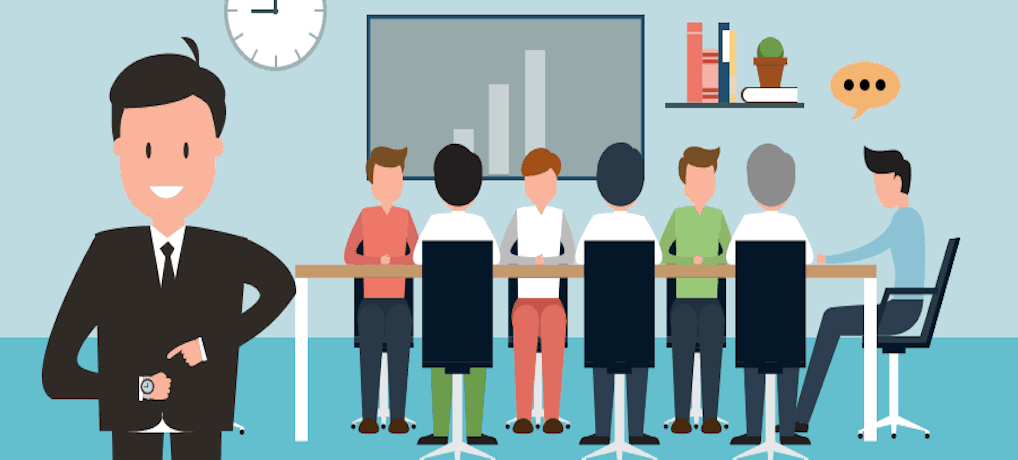